In [1]:
import pandas as pd
from tech_core.feature_pipeline import FeaturesPipeline
from tech_core.losses import StreamingSharpeLoss
from tech_core.nn_builder import SimplePortfolioAllocator, DeepPortfolioAllocator_1
import torch
from tqdm import tqdm
# ??? Should we make different train periods for different models?

In [2]:
path_to_data = '../data/'

split_dates = [
    pd.Timestamp("2025-01-01")
]
split_names = ['train', 'test']

fee = 1.53e-4 * 3
padding = 35
batch_size_config = {
    0: 1000,
    # 40: 4000,
    # 80: 10000
}
num_epochs = 200
adam_lr = 1e-1
log_freq = 5

In [3]:
prev_models = []

batch_size = batch_size_config[0]
pipeline = FeaturesPipeline(
    path_to_data,
    padding=padding,
    batch_size=batch_size,
    split_dates=split_dates,
    split_names=split_names
)

cmf_dim = asset_dim = num_assets = None
for common_feats, asset_feats, fut_ret, _, _ in tqdm(pipeline.iterate('train'), desc="Loading features"):
    cmf_dim = common_feats.shape[1]
    asset_dim = asset_feats.shape[2]
    num_assets = asset_feats.shape[1]
    break
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Loading features: 0it [00:00, ?it/s]


  0%|          | 0/200 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


  2%|▏         | 4/200 [03:54<3:10:36, 58.35s/it]

Sharpe Ratio for the epoch: 2.3150
Average Weights:



,Weight
TRGP,6.599489e-01
IP,3.013685e-01
GRMN,1.405458e-02
IRM,9.021382e-03
JPM,5.433596e-03
...,...
AAL,1.015900e-07
ZBH,9.941105e-08
ALB,7.807446e-08
PODD,6.974723e-08


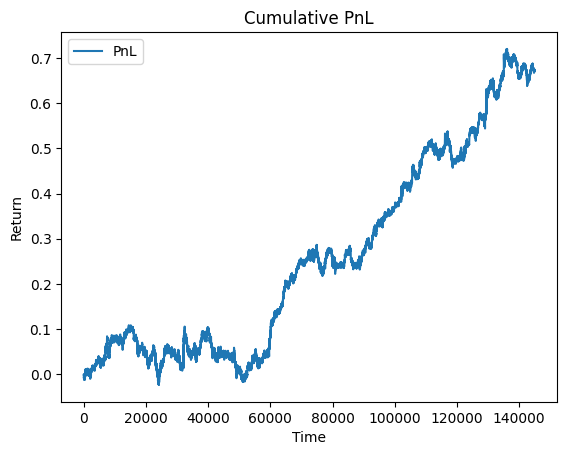

Epoch 5: Loss = 8.109606742858887
Sharpe Ratio for the epoch: 0.9539
Average Weights:



,Weight
IP,9.898266e-01
GRMN,3.637326e-03
IRM,2.472897e-03
JPM,1.239899e-03
TRGP,3.650021e-04
...,...
AAL,2.113040e-08
ZBH,2.075115e-08
ALB,1.622274e-08
PODD,1.449256e-08


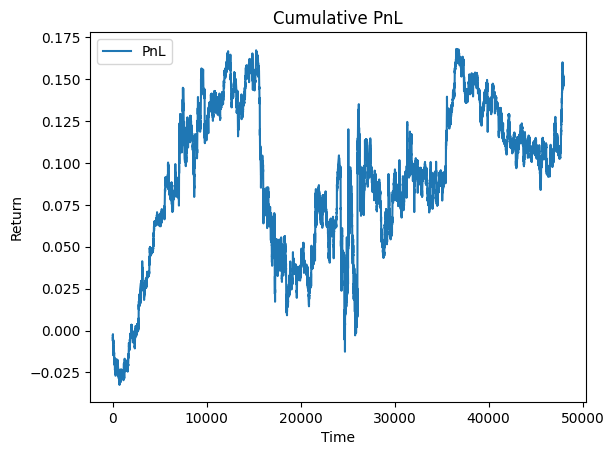

  4%|▍         | 9/200 [08:42<2:59:48, 56.49s/it]

Sharpe Ratio for the epoch: 2.0267
Average Weights:



,Weight
GRMN,3.689615e-01
IRM,2.373807e-01
PM,1.841299e-01
IBM,7.255798e-02
JPM,4.519076e-02
...,...
AAL,2.184567e-07
ZBH,2.181692e-07
ALB,1.690906e-07
PODD,1.573679e-07


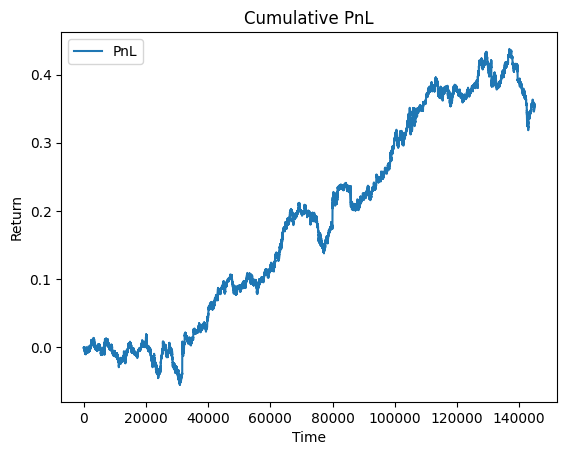

Epoch 10: Loss = -0.3944056034088135
Sharpe Ratio for the epoch: 2.3496
Average Weights:



,Weight
IRM,3.273064e-01
GRMN,2.014110e-01
PM,1.738122e-01
BKNG,8.805519e-02
PTC,6.454030e-02
...,...
ZBH,2.432256e-07
AAL,2.420574e-07
ALB,1.872427e-07
PODD,1.748655e-07


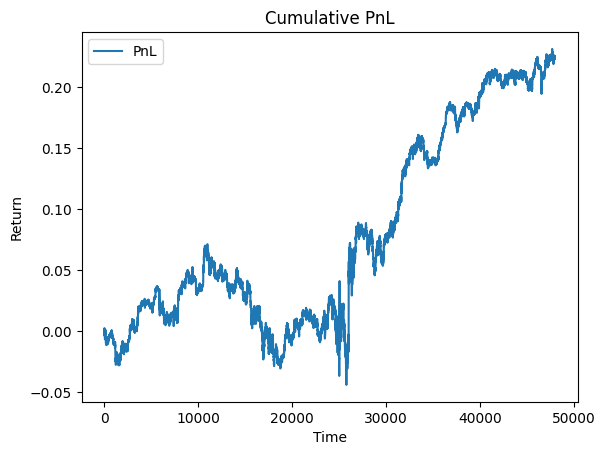

  7%|▋         | 14/200 [12:48<2:35:55, 50.30s/it]

Sharpe Ratio for the epoch: 1.8000
Average Weights:



,Weight
IBM,9.665546e-01
GRMN,1.060261e-02
IRM,7.001079e-03
PM,5.286512e-03
WMT,2.462871e-03
...,...
ZBH,7.089731e-09
AAL,7.003540e-09
ALB,5.427425e-09
PODD,5.233789e-09


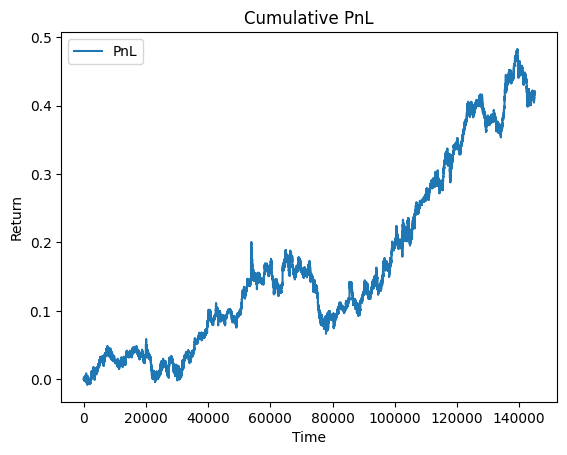

Epoch 15: Loss = -2.968731641769409
Sharpe Ratio for the epoch: 3.5634
Average Weights:



,Weight
IBM,9.406921e-01
GRMN,1.760978e-02
WMT,1.151306e-02
IRM,1.060560e-02
PM,7.474884e-03
...,...
ZBH,1.028080e-08
AAL,1.012569e-08
ALB,7.838727e-09
PODD,7.548394e-09


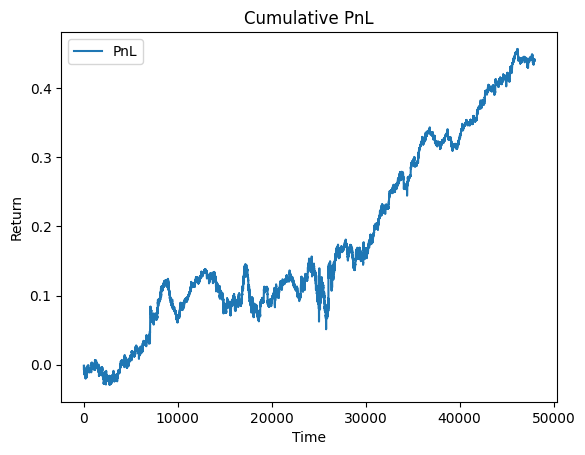

 10%|▉         | 19/200 [16:50<2:26:36, 48.60s/it]

Sharpe Ratio for the epoch: 1.4499
Average Weights:



,Weight
IBM,6.621370e-01
GRMN,8.879177e-02
IRM,8.630636e-02
TRGP,6.957090e-02
PM,5.737107e-02
...,...
ZBH,2.851792e-08
AAL,2.806801e-08
ALB,2.178561e-08
PODD,2.139211e-08


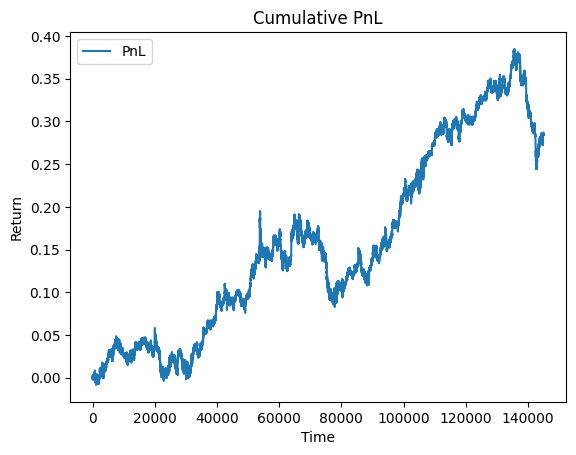

Epoch 20: Loss = -5.003518104553223
Sharpe Ratio for the epoch: 1.0623
Average Weights:



,Weight
TRGP,5.549527e-01
IBM,1.636658e-01
PM,9.686816e-02
GRMN,7.747594e-02
IRM,6.038221e-02
...,...
ZBH,3.842547e-08
AAL,3.767839e-08
ALB,2.922314e-08
PODD,2.871920e-08


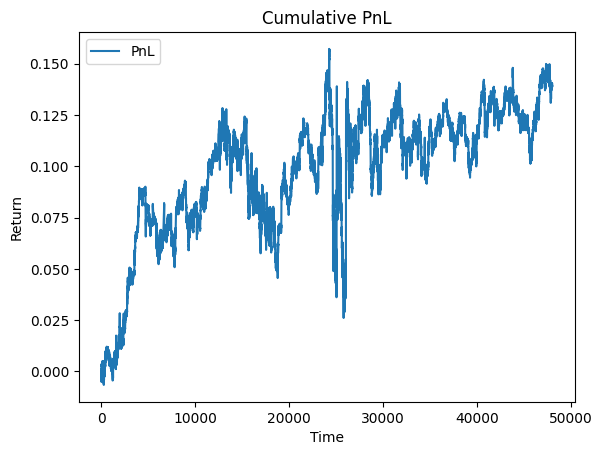

 12%|█▏        | 24/200 [20:52<2:21:56, 48.39s/it]

Sharpe Ratio for the epoch: 2.1847
Average Weights:



,Weight
GRMN,2.409389e-01
IBM,2.334556e-01
IRM,2.199456e-01
TRGP,8.707239e-02
PM,7.088562e-02
...,...
DG,2.788645e-08
AAL,2.739163e-08
PODD,2.128940e-08
ALB,2.124278e-08


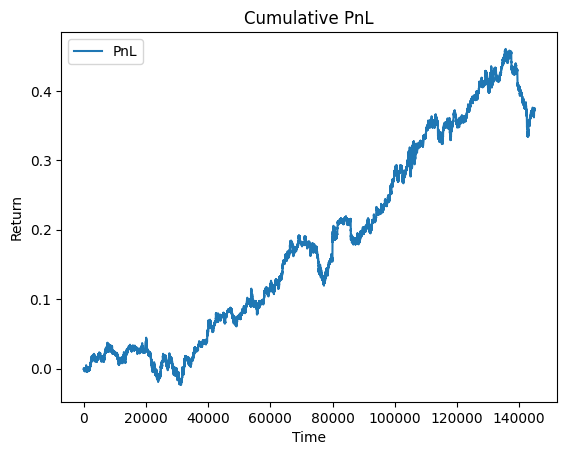

Epoch 25: Loss = -4.025680065155029
Sharpe Ratio for the epoch: 1.4562
Average Weights:



,Weight
TRGP,4.112495e-01
BKNG,1.563851e-01
GRMN,1.476570e-01
PM,1.235622e-01
IRM,5.174766e-02
...,...
DG,2.767045e-08
AAL,2.713007e-08
PODD,2.108299e-08
ALB,2.102153e-08


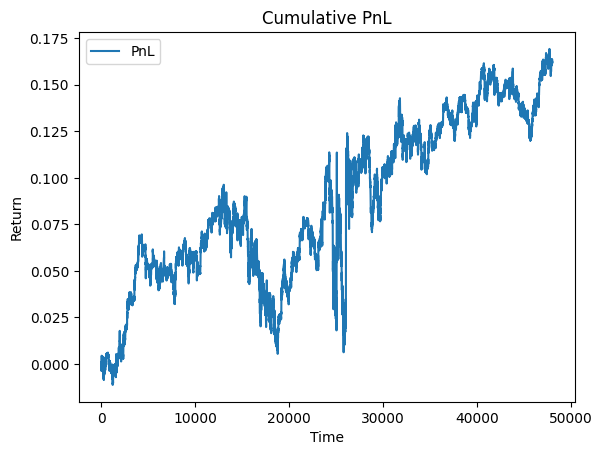

 14%|█▍        | 29/200 [24:56<2:18:39, 48.65s/it]

Sharpe Ratio for the epoch: 2.3846
Average Weights:



,Weight
GRMN,2.302273e-01
IRM,2.290176e-01
BKNG,1.301728e-01
PM,9.611246e-02
IBM,8.394258e-02
...,...
DG,1.821837e-08
AAL,1.798577e-08
PODD,1.417803e-08
ALB,1.392876e-08


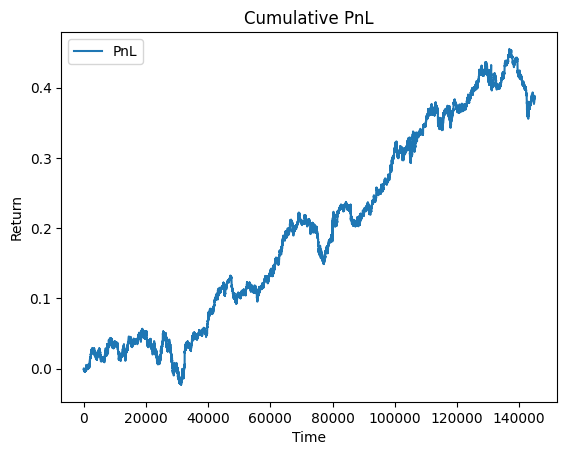

Epoch 30: Loss = -0.6057778000831604
Sharpe Ratio for the epoch: 3.2807
Average Weights:



,Weight
BKNG,1.819925e-01
GRMN,1.702791e-01
PM,1.681912e-01
IRM,1.504883e-01
IBM,1.471784e-01
...,...
DG,2.144864e-08
AAL,2.113997e-08
PODD,1.666528e-08
ALB,1.635659e-08


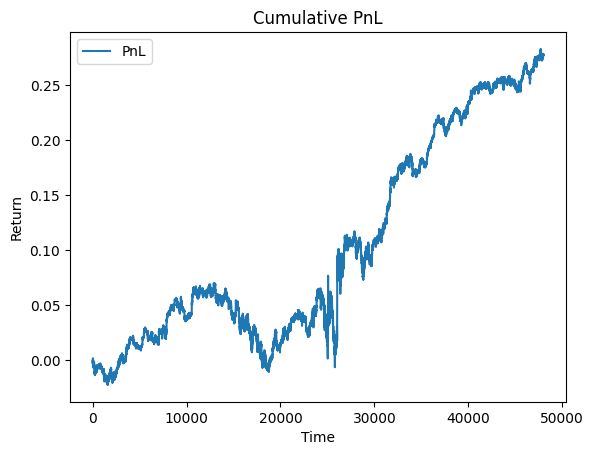

 17%|█▋        | 34/200 [29:00<2:14:58, 48.78s/it]

Sharpe Ratio for the epoch: 2.3174
Average Weights:



,Weight
GRMN,2.207279e-01
IRM,1.910761e-01
IBM,1.244026e-01
BKNG,1.060691e-01
PM,7.925144e-02
...,...
DG,1.469374e-08
AAL,1.457508e-08
PODD,1.169720e-08
ALB,1.128038e-08


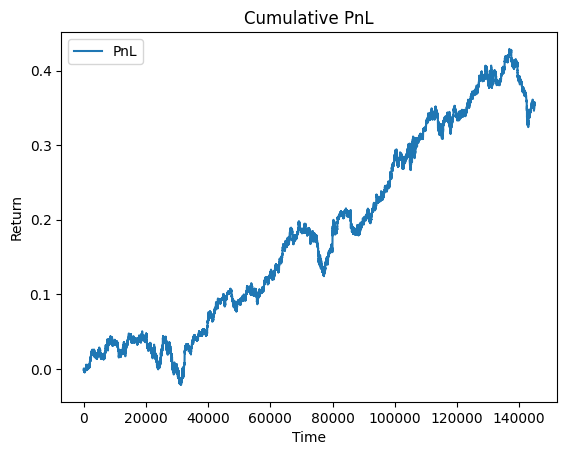

Epoch 35: Loss = -1.8590720891952515
Sharpe Ratio for the epoch: 2.7299
Average Weights:



,Weight
GRMN,1.622616e-01
PM,1.495336e-01
BKNG,1.400047e-01
TRGP,1.194095e-01
IRM,1.169545e-01
...,...
DG,1.604396e-08
AAL,1.588860e-08
PODD,1.275718e-08
ALB,1.228438e-08


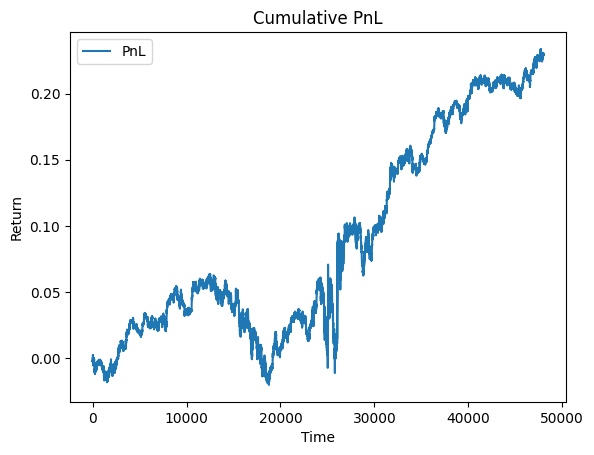

 20%|█▉        | 39/200 [33:04<2:10:48, 48.75s/it]

Sharpe Ratio for the epoch: 2.3391
Average Weights:



,Weight
GRMN,2.053793e-01
IRM,1.983590e-01
BKNG,1.021282e-01
IBM,9.528922e-02
PM,7.604625e-02
...,...
DG,1.058941e-08
AAL,1.053693e-08
PODD,8.618455e-09
ALB,8.152685e-09


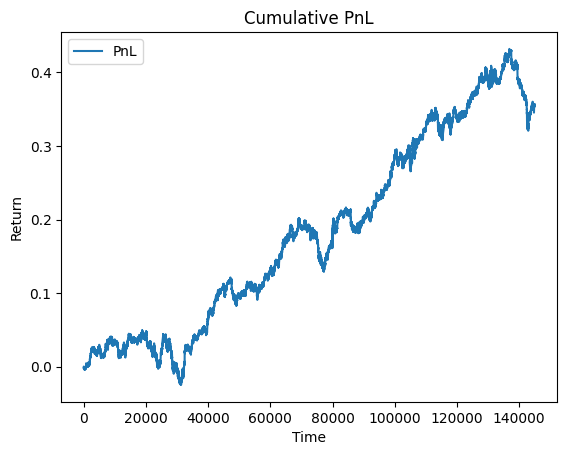

Epoch 40: Loss = -2.8428804874420166
Sharpe Ratio for the epoch: 2.4226
Average Weights:



,Weight
TRGP,1.972420e-01
GRMN,1.592735e-01
PM,1.420244e-01
BKNG,1.261850e-01
IRM,1.088979e-01
...,...
DG,1.123002e-08
AAL,1.115821e-08
PODD,9.134197e-09
ALB,8.625546e-09


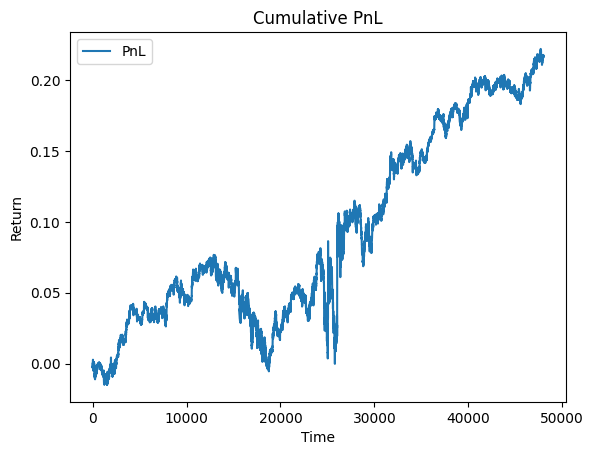

 22%|██▏       | 44/200 [37:09<2:06:50, 48.79s/it]

Sharpe Ratio for the epoch: 2.3581
Average Weights:



,Weight
IRM,2.036387e-01
GRMN,1.991882e-01
IBM,9.577991e-02
BKNG,9.503540e-02
PM,7.272474e-02
...,...
DG,8.057522e-09
AAL,8.051540e-09
PODD,6.724129e-09
ALB,6.228664e-09


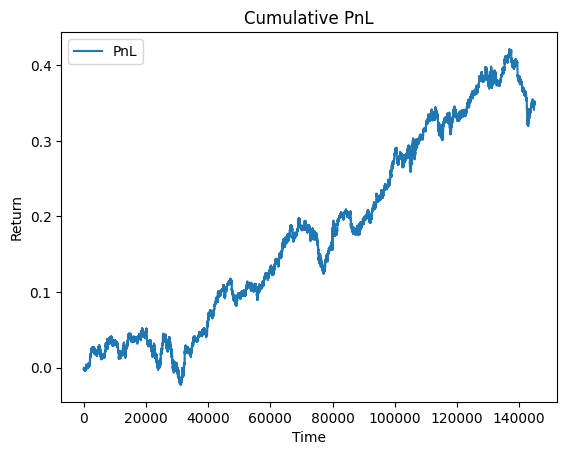

Epoch 45: Loss = -2.3159658908843994
Sharpe Ratio for the epoch: 2.8387
Average Weights:



,Weight
GRMN,1.479812e-01
PM,1.278929e-01
BKNG,1.228856e-01
IRM,1.187405e-01
TRGP,1.113861e-01
...,...
DG,8.211821e-09
AAL,8.194478e-09
PODD,6.852245e-09
ALB,6.333330e-09


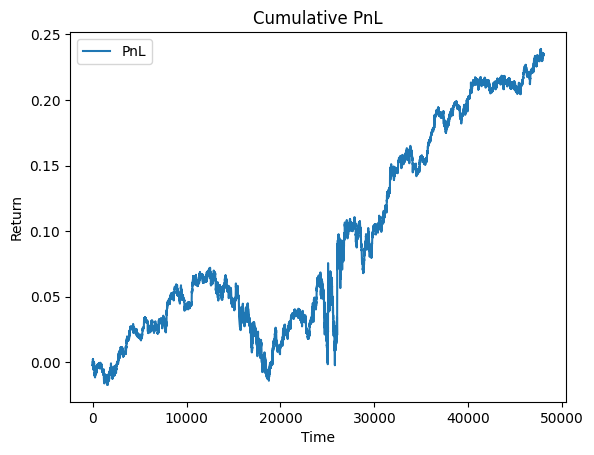

 24%|██▍       | 49/200 [41:13<2:03:05, 48.91s/it]

Sharpe Ratio for the epoch: 2.3023
Average Weights:



,Weight
GRMN,1.934778e-01
IRM,1.917702e-01
BKNG,9.597604e-02
IBM,8.886622e-02
JPM,7.391316e-02
...,...
AAL,6.256391e-09
DG,6.226648e-09
PODD,5.352453e-09
ALB,4.838983e-09


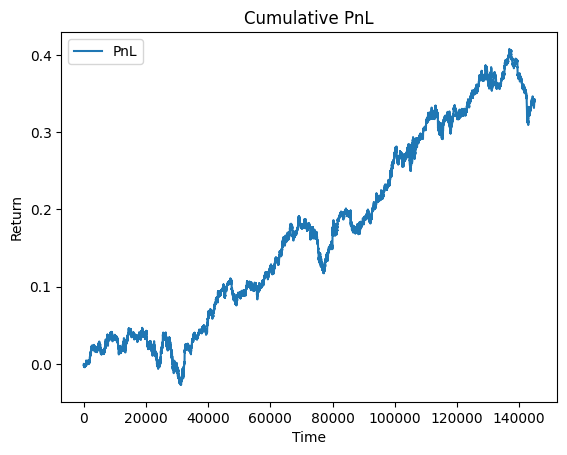

Epoch 50: Loss = -1.7722673416137695
Sharpe Ratio for the epoch: 3.0066
Average Weights:



,Weight
GRMN,1.718656e-01
IRM,1.495341e-01
PM,1.320673e-01
BKNG,1.139828e-01
IBM,9.676959e-02
...,...
AAL,6.636244e-09
DG,6.613180e-09
PODD,5.686760e-09
ALB,5.127809e-09


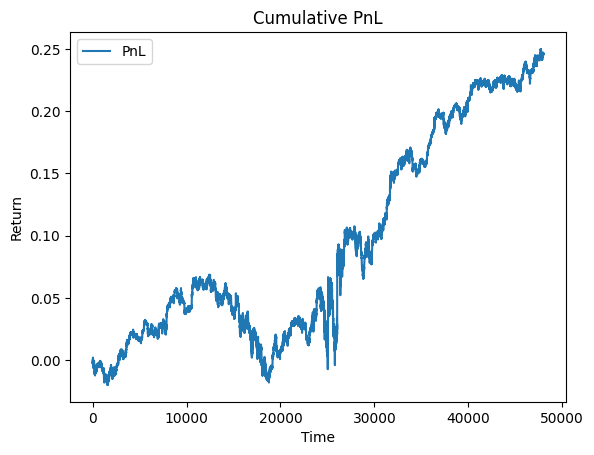

 27%|██▋       | 54/200 [45:19<1:59:23, 49.07s/it]

Sharpe Ratio for the epoch: 2.3575
Average Weights:



,Weight
IRM,1.941590e-01
GRMN,1.920860e-01
BKNG,9.161518e-02
IBM,8.579242e-02
JPM,7.674864e-02
...,...
AAL,4.844393e-09
DG,4.791388e-09
PODD,4.255657e-09
ALB,3.746431e-09


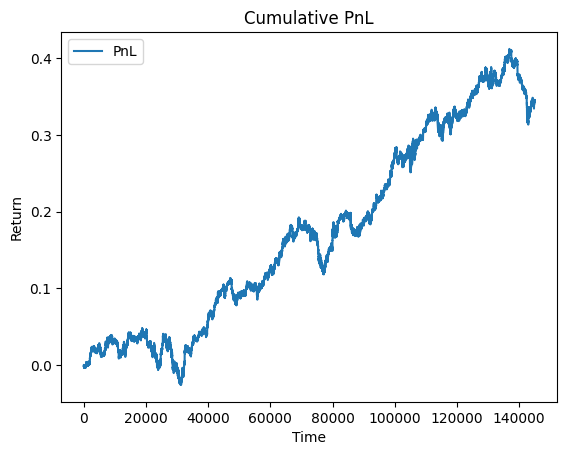

Epoch 55: Loss = -2.4385204315185547
Sharpe Ratio for the epoch: 2.9098
Average Weights:



,Weight
GRMN,1.423570e-01
WMT,1.366874e-01
IRM,1.174795e-01
BKNG,1.157803e-01
PM,1.156439e-01
...,...
AAL,4.910252e-09
DG,4.861592e-09
PODD,4.323575e-09
ALB,3.793770e-09


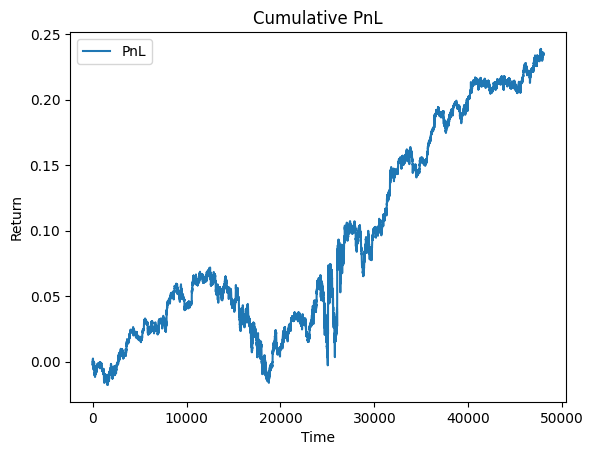

 30%|██▉       | 59/200 [49:23<1:54:39, 48.79s/it]

Sharpe Ratio for the epoch: 2.3344
Average Weights:



,Weight
GRMN,1.865717e-01
IRM,1.864019e-01
BKNG,9.060363e-02
IBM,8.686090e-02
JPM,7.564094e-02
...,...
BBY,3.745829e-09
DG,3.709049e-09
PODD,3.415262e-09
ALB,2.920022e-09


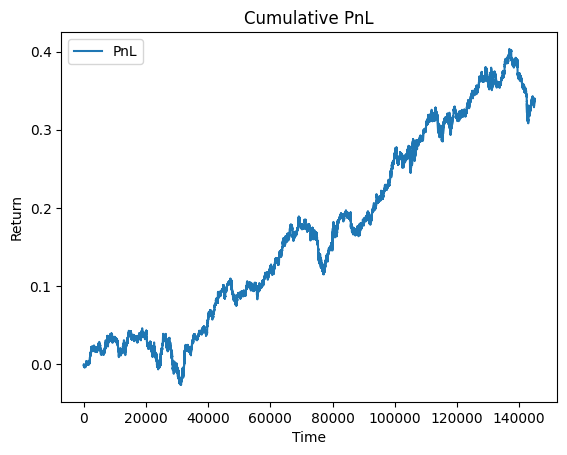

Epoch 60: Loss = -2.164707899093628
Sharpe Ratio for the epoch: 2.9394
Average Weights:



,Weight
WMT,1.533653e-01
GRMN,1.529499e-01
IRM,1.267752e-01
PM,1.113992e-01
BKNG,1.079055e-01
...,...
BBY,3.833124e-09
DG,3.796494e-09
PODD,3.502579e-09
ALB,2.983210e-09


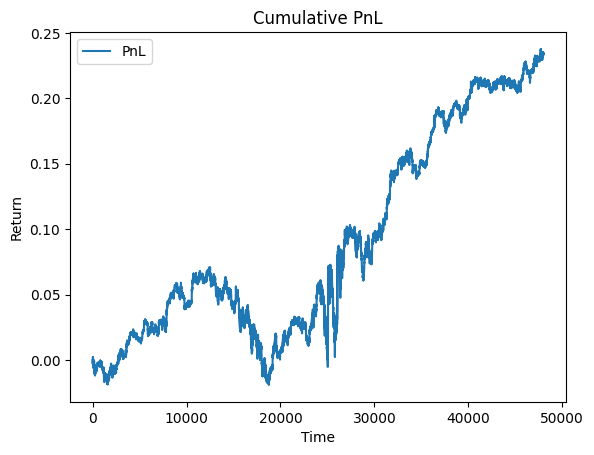

 32%|███▏      | 64/200 [53:26<1:49:58, 48.52s/it]

Sharpe Ratio for the epoch: 2.2910
Average Weights:



,Weight
GRMN,1.865098e-01
IRM,1.833822e-01
BKNG,8.913142e-02
IBM,8.146949e-02
JPM,7.465832e-02
...,...
BBY,2.627722e-09
DG,2.607273e-09
PODD,2.494141e-09
ALB,2.067487e-09


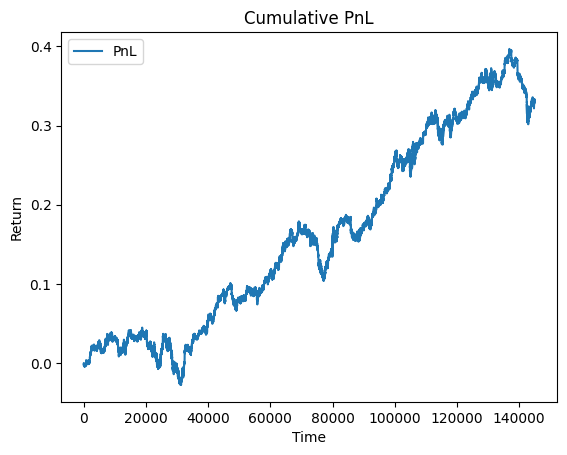

Epoch 65: Loss = -2.4865963459014893
Sharpe Ratio for the epoch: 2.8687
Average Weights:



,Weight
WMT,1.638291e-01
GRMN,1.416429e-01
IRM,1.160983e-01
BKNG,1.103892e-01
IBM,1.002387e-01
...,...
BBY,2.642893e-09
DG,2.623213e-09
PODD,2.514183e-09
ALB,2.075998e-09


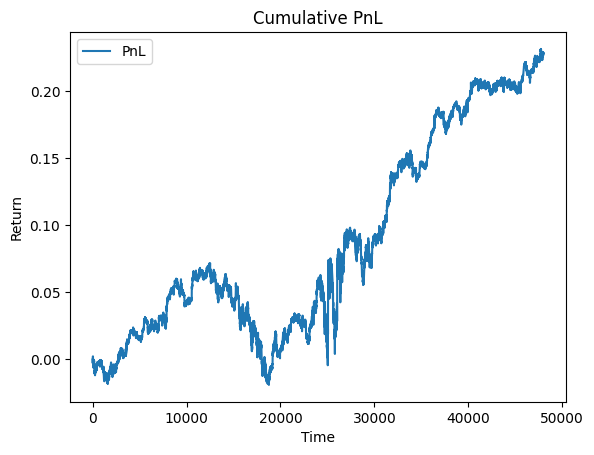

 34%|███▎      | 67/200 [55:58<1:51:29, 50.29s/it]

In [ ]:
from copy import deepcopy

loss_fn = StreamingSharpeLoss(
    fee=fee,
    asset_names=pipeline.reader.asset_names + ['Cash'],
)

prev_models = []
for i in range(len(prev_models), 10):

    # ad-hoc so far, mb add this to pipeline
    train_cash_left = []
    for common_feats_old, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):

        # Перевод в тензоры
        common_feats = torch.tensor(common_feats_old.values, dtype=torch.float32).to(device)       # (T, d_common)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            common_feats_tmp = common_feats_old.copy()
            common_feats_tmp['cash_left'] = cash_left.detach().numpy()
            common_feats_tmp = torch.tensor(common_feats_tmp.values, dtype=torch.float32).to(device)
            cash_left *= prev_model(common_feats_tmp, asset_feats)[:, -1:]

        train_cash_left.append(cash_left.detach())
    
    test_cash_left = []
    for common_feats_old, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('test'):

        common_feats = torch.tensor(common_feats_old.values, dtype=torch.float32).to(device)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)
        
        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            common_feats_tmp = common_feats_old.copy()
            common_feats_tmp['cash_left'] = cash_left.detach().numpy()
            common_feats_tmp = torch.tensor(common_feats_tmp.values, dtype=torch.float32).to(device)
            cash_left *= prev_model(common_feats_tmp, asset_feats)[:, -1:]
        test_cash_left.append(cash_left.detach())

    model = SimplePortfolioAllocator(
        cmf_dim=cmf_dim + 1,
        num_assets=num_assets,
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)

    for epoch in tqdm(range(num_epochs)):
        if epoch in batch_size_config:
            print(f"Changing batch size to {batch_size_config[epoch]} at epoch {epoch}")
            batch_size = batch_size_config[epoch]
            pipeline = FeaturesPipeline(
                path_to_data,
                padding=padding,
                batch_size=batch_size,
                split_dates=split_dates,
                split_names=split_names
            )

        loss_fn.reset()
        pipeline.reset()
        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('train'), train_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()

            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

            if len(common_feats) != batch_size:
                continue

            optimizer.zero_grad()

            # Вычисляем веса
            weights = model(common_feats, asset_feats)

            # Обновляем метрику
            loss_value = loss_fn.forward(
                weights=weights,
                returns=fut_ret,
                prev_model_cash=cash_left,
                min_prices=min_prices,
                market_caps=market_caps
            )
            loss_value.backward()

            optimizer.step()

        if (epoch + 1) % log_freq == 0:
            _, weights_df = loss_fn.plot_whole_epoch_loss()
            weights_df.to_csv(f'weights_iteration_{i}_epoch_{epoch + 1}.csv')
            torch.save(model.state_dict(), f'model_iteration_{i}_epoch_{epoch + 1}.pth')
            print(f"Epoch {epoch + 1}: Loss = {loss_value.item()}")
        loss_fn.reset()  # Сбрасываем метрику для следующей эпохи

        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('test'), test_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)

            if len(common_feats) !=  batch_size:
                continue

            weights = model(common_feats, asset_feats)
            loss_fn.forward(weights=weights, returns=fut_ret, prev_model_cash=cash_left, min_prices=min_prices, market_caps=market_caps)

        if (epoch + 1) % log_freq == 0:
            loss_fn.plot_whole_epoch_loss()
        loss_fn.reset()

    prev_models.append(deepcopy(model))
    print(f"Iteration {i + 1} completed.")